In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"taxi_clean_2023.csv")
print(df.head())
print(df.shape)

   taxi_type          PU_datetime  PU_month  PU_day  PU_hour  PU_day_of_week  \
0          1  2023-03-07 14:07:12         3       7       14               2   
1          1  2023-03-07 14:37:50         3       7       14               2   
2          1  2023-03-07 14:57:46         3       7       14               2   
3          1  2023-03-07 18:30:17         3       7       18               2   
4          1  2023-03-07 20:28:25         3       7       20               2   

           DO_datetime  DO_month  DO_day  DO_hour  ...  DO_estimated_income  \
0  2023-03-07 14:26:47         3       7       14  ...             137500.0   
1  2023-03-07 14:42:11         3       7       14  ...             137500.0   
2  2023-03-07 15:09:36         3       7       15  ...             137500.0   
3  2023-03-07 19:00:21         3       7       19  ...              42500.0   
4  2023-03-07 21:09:20         3       7       21  ...              55000.0   

   DO_income_quartile tip_percentage trip_du

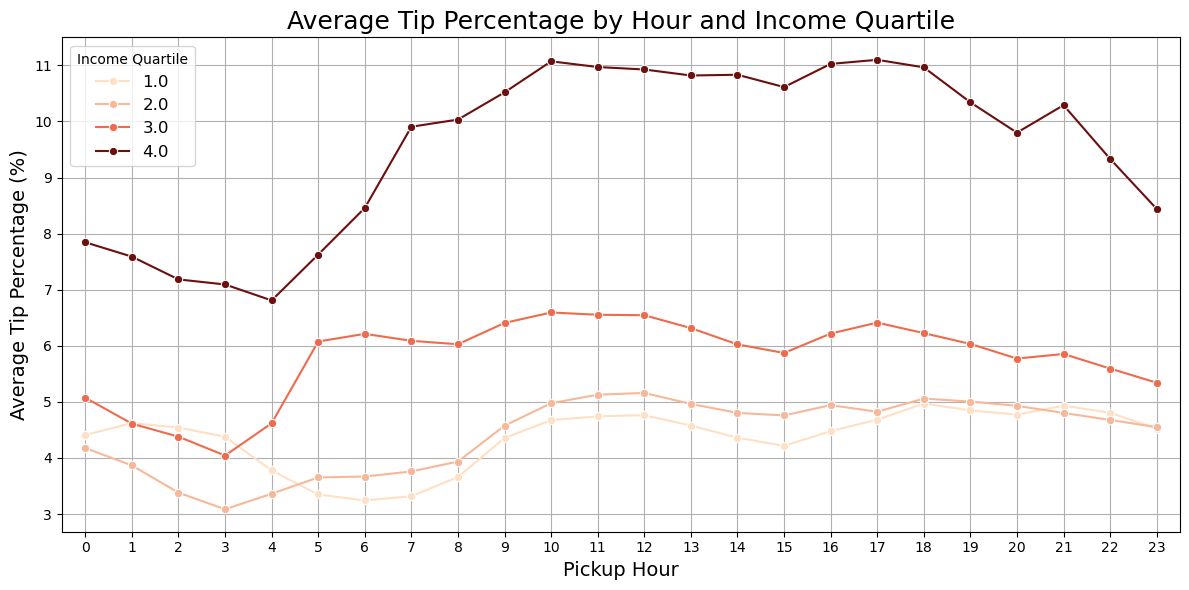

In [7]:
# Group by PU_hour and PU_income_quartile, then calculate the average tip_percentage
grouped = df.groupby(['PU_hour', 'PU_income_quartile'])['tip_percentage'].mean().reset_index()
# Define custom colors matching the map
custom_palette = {
    1.0: '#fde0c5',
    2.0: '#f7b799',
    3.0: '#ee6b4d',
    4.0: '#6c0f0f'
}

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped,
    x='PU_hour',
    y='tip_percentage',
    hue='PU_income_quartile',
    palette=custom_palette,
    marker='o'
)

plt.title('Average Tip Percentage by Hour and Income Quartile', fontsize = 18)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Average Tip Percentage (%)', fontsize=14)
plt.legend(title='Income Quartile', loc='upper left', fontsize = 12)
plt.xticks(range(0, 24))
plt.grid(True)

# Set tighter x-limits to remove side padding
plt.xlim(-0.5, 23.5)

plt.tight_layout()

plt.savefig('Images/average_tip_percentage_by_hour_and_income_quartile.png', dpi=300)

plt.show()


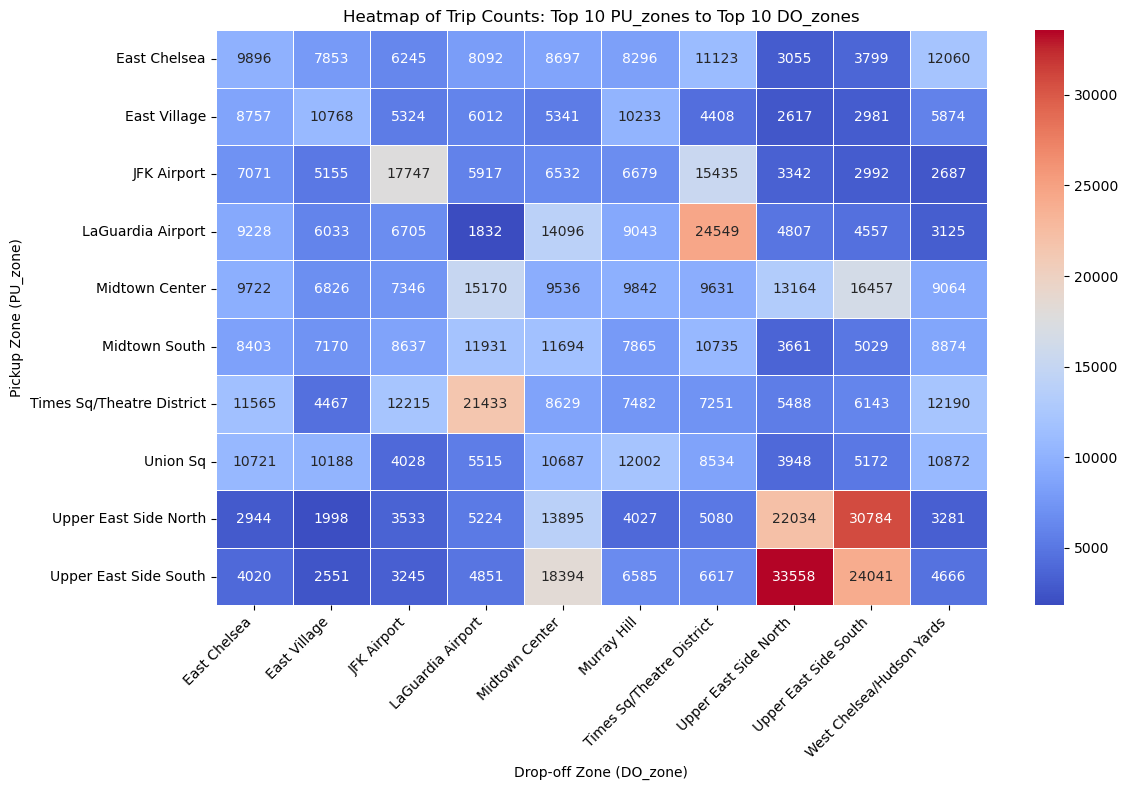

In [11]:
# Step 1: Identify Top 10 PU_zones and DO_zones by frequency
top_pu_zones = df['PU_zone'].value_counts().head(10).index.tolist()
top_do_zones = df['DO_zone'].value_counts().head(10).index.tolist()

# Step 2: Filter rows where both PU_zone and DO_zone are in their respective top 10s
filtered_df = df[
    (df['PU_zone'].isin(top_pu_zones)) &
    (df['DO_zone'].isin(top_do_zones))
]

# Step 3: Create pivot table of trip counts from PU_zone to DO_zone
heatmap_data = pd.pivot_table(
    filtered_df,
    index='PU_zone',
    columns='DO_zone',
    aggfunc='size',
    fill_value=0
)

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt='d', linewidths=0.5)
plt.title("Heatmap of Trip Counts: Top 10 PU_zones to Top 10 DO_zones")
plt.xlabel("Drop-off Zone (DO_zone)")
plt.ylabel("Pickup Zone (PU_zone)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('Images/heatmap_of_trip_counts:top10_pu_and_do_zones.png', dpi=300)

plt.show()


In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify overall top 10 PU and DO zones
top_pu_zones = df['PU_zone'].value_counts().head(10).index.tolist()
top_do_zones = df['DO_zone'].value_counts().head(10).index.tolist()

# Step 2: Create output directory with correct casing
os.makedirs('Images/monthly_heatmaps', exist_ok=True)

# Step 3: Loop over each DO_month
for month, monthly_df in df.groupby('DO_month'):
    # Filter to only rows with top PU and DO zones
    filtered_df = monthly_df[
        (monthly_df['PU_zone'].isin(top_pu_zones)) &
        (monthly_df['DO_zone'].isin(top_do_zones))
    ]

    # Create pivot table
    heatmap_data = pd.pivot_table(
        filtered_df,
        index='PU_zone',
        columns='DO_zone',
        aggfunc='size',
        fill_value=0
    )

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt='d', linewidths=0.5)
    plt.title(f"Heatmap of Trip Counts - {month}", fontsize=16)
    plt.xlabel("Drop-off Zone (DO_zone)")
    plt.ylabel("Pickup Zone (PU_zone)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Properly format month and save plot
    filename = f"Images/monthly_heatmaps/heatmap_{str(month)}.png"
    plt.savefig(filename, dpi=300)
    plt.close()

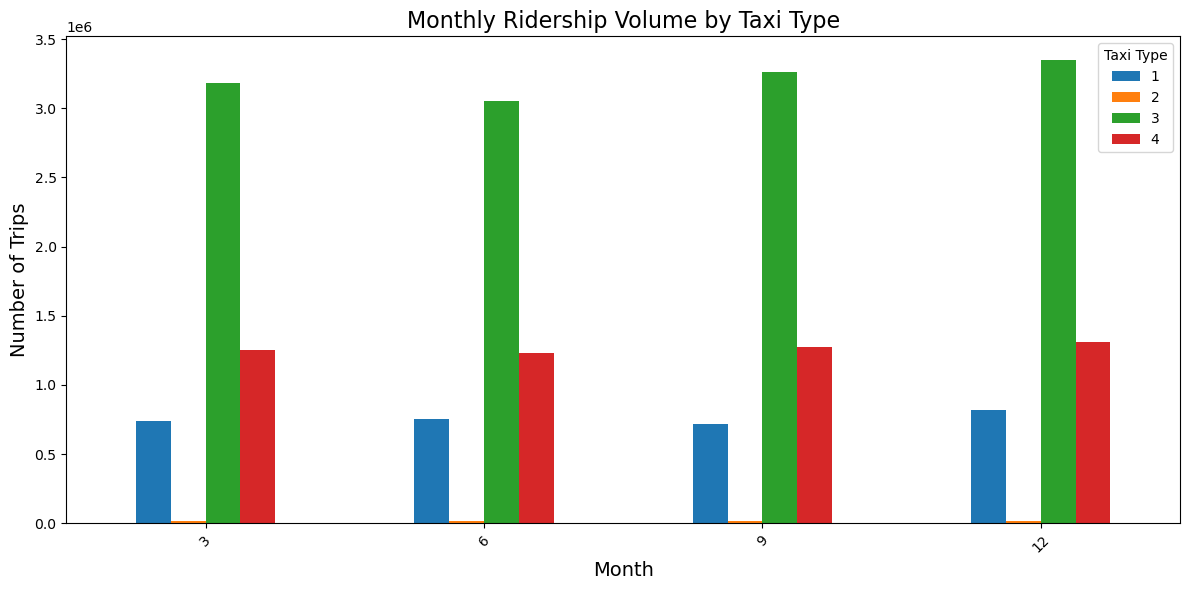

In [20]:
# Step 1: Group by DO_month and taxi_type to get trip counts
monthly_volume = df.groupby(['DO_month', 'taxi_type']).size().reset_index(name='trip_count')

# Step 2: Pivot to wide format
pivot_volume = monthly_volume.pivot(index='DO_month', columns='taxi_type', values='trip_count').fillna(0)

# Step 3: Plot grouped bar chart
pivot_volume.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Ridership Volume by Taxi Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Taxi Type')
plt.tight_layout()
plt.savefig('Images/ridership_by_month.png', dpi=300)
plt.show()


<Figure size 1200x600 with 0 Axes>

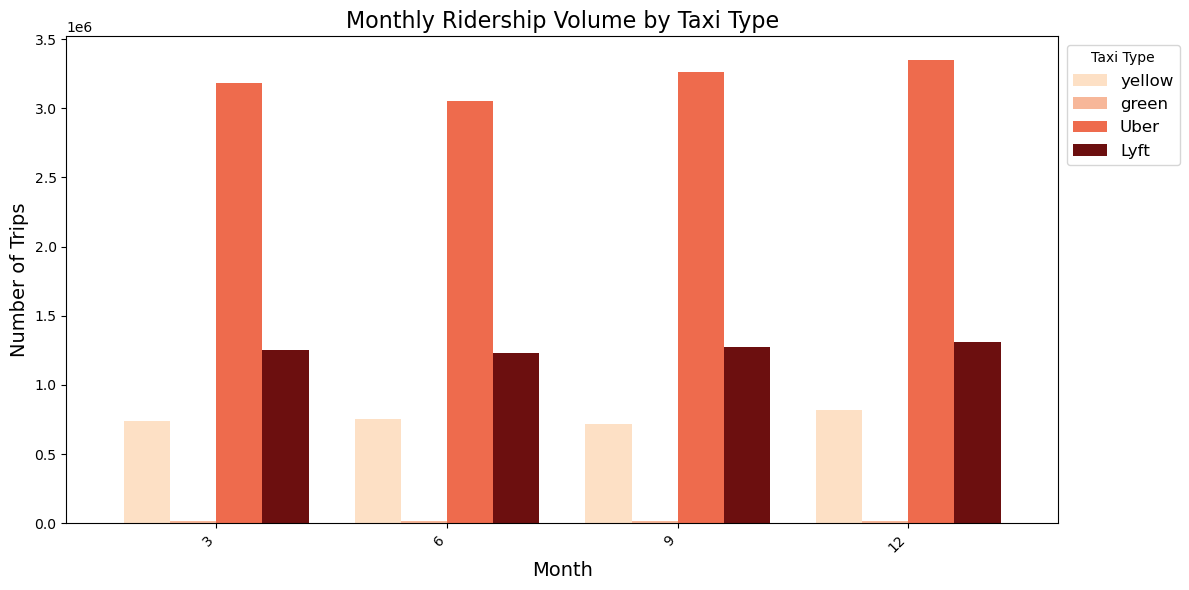

In [22]:
# Step 1: Group by DO_month and taxi_type to get trip counts
monthly_volume = df.groupby(['DO_month', 'taxi_type']).size().reset_index(name='trip_count')

# Step 2: Pivot to wide format (so each taxi_type is a separate column)
pivot_volume = monthly_volume.pivot(index='DO_month', columns='taxi_type', values='trip_count').fillna(0)

# Step 3: Create the custom color palette for taxi types
custom_palette = {
    1.0: '#fde0c5',  # yellow
    2.0: '#f7b799',  # green
    3.0: '#ee6b4d',  # Uber
    4.0: '#6c0f0f'   # Lyft
}

# Step 4: Plot grouped bar chart with custom colors
plt.figure(figsize=(12, 6))

# Assign custom colors to the bars by using the palette
pivot_volume.plot(kind='bar', stacked=False, figsize=(12, 6), width=0.8, color=[custom_palette[col] for col in pivot_volume.columns])

# Step 5: Customize the plot
plt.title('Monthly Ridership Volume by Taxi Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels to make them more readable

# Custom labels for the legend (replace numeric with text labels)
custom_labels = {1: 'yellow', 2: 'green', 3: 'Uber', 4: 'Lyft'}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [custom_labels[int(label)] for label in labels]  # Map numeric labels to text
plt.legend(handles, new_labels, title='Taxi Type', fontsize=12, bbox_to_anchor=(1, 1))

# Adjust layout to make sure everything fits
plt.tight_layout()

# Step 6: Save the plot as an image and display it
plt.savefig('Images/ridership_by_month.png', dpi=300)
plt.show()

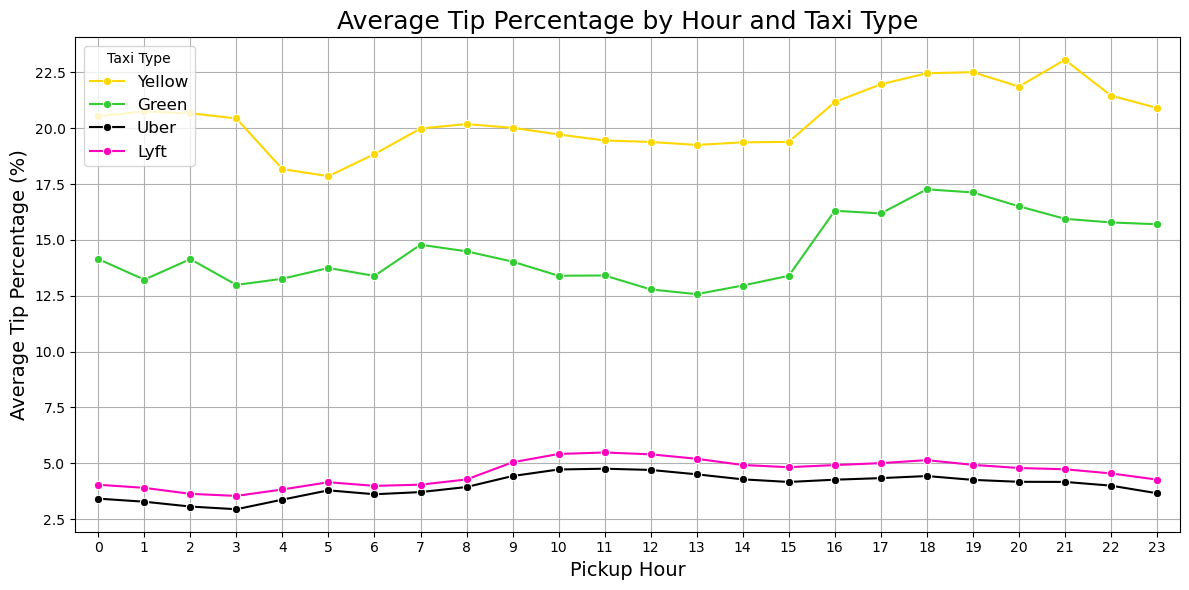

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by PU_hour and taxi_type, then calculate average tip_percentage
grouped = df.groupby(['PU_hour', 'taxi_type'])['tip_percentage'].mean().reset_index()

# Define custom labels and colors
custom_labels = {1: 'Yellow', 2: 'Green', 3: 'Uber', 4: 'Lyft'}
custom_palette = {
    'Yellow': '#FFD700',
    'Green': '#32CD32',
    'Uber': '#000000',
    'Lyft': '#FF00BF'
}

# Map taxi_type to labels
grouped['taxi_label'] = grouped['taxi_type'].map(custom_labels)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped,
    x='PU_hour',
    y='tip_percentage',
    hue='taxi_label',
    palette=custom_palette,
    marker='o'
)

plt.title('Average Tip Percentage by Hour and Taxi Type', fontsize=18)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Average Tip Percentage (%)', fontsize=14)
plt.legend(title='Taxi Type', loc='upper left', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.xlim(-0.5, 23.5)

plt.tight_layout()
plt.savefig('Images/average_tip_percentage_by_hour_and_taxi_type.png', dpi=300)
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify overall top 10 PU and DO zones
top_pu_zones = df['PU_zone'].value_counts().head(10).index.tolist()
top_do_zones = df['DO_zone'].value_counts().head(10).index.tolist()

# Step 2: Create output directory
os.makedirs('image/monthly_heatmaps', exist_ok=True)

# Step 3: Loop over each DO_month
for month, monthly_df in df.groupby('DO_month'):
    # Filter to only rows with top PU and DO zones
    filtered_df = monthly_df[
        (monthly_df['PU_zone'].isin(top_pu_zones)) &
        (monthly_df['DO_zone'].isin(top_do_zones))
    ]

    # Create pivot table
    heatmap_data = pd.pivot_table(
        filtered_df,
        index='PU_zone',
        columns='DO_zone',
        aggfunc='size',
        fill_value=0
    )

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt='d', linewidths=0.5)
    plt.title(f"Heatmap of Trip Counts - {month}", fontsize=16)
    plt.xlabel("Drop-off Zone (DO_zone)")
    plt.ylabel("Pickup Zone (PU_zone)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Save figure
    plt.savefig(f'image/monthly_heatmaps/heatmap_{month}.png', dpi=300)
    plt.close()


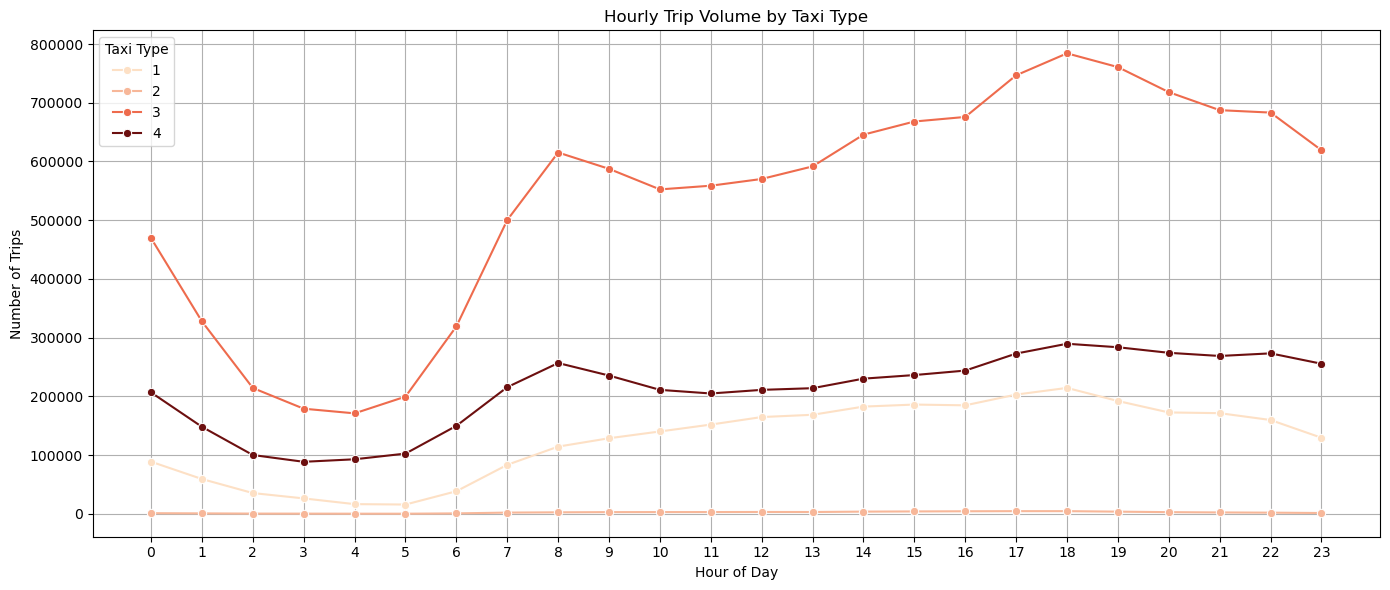

In [43]:
# Custom color palette for taxi types (same as before)
custom_palette = {
    1.0: '#fde0c5',  # yellow
    2.0: '#f7b799',  # green
    3.0: '#ee6b4d',  # Uber
    4.0: '#6c0f0f'   # Lyft
}

# Group by taxi_type and PU_hour
hourly_trends = df.groupby(['taxi_type', 'PU_hour']).size().reset_index(name='trip_count')

# Plotting with custom colors
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=hourly_trends,
    x='PU_hour',
    y='trip_count',
    hue='taxi_type',
    marker='o',
    palette=custom_palette  # Applying the custom color palette
)

plt.title("Hourly Trip Volume by Taxi Type")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Taxi Type")
plt.tight_layout()
plt.savefig('Images/hourly_trip_volume_by_taxi_type.png', dpi=300)
plt.show()


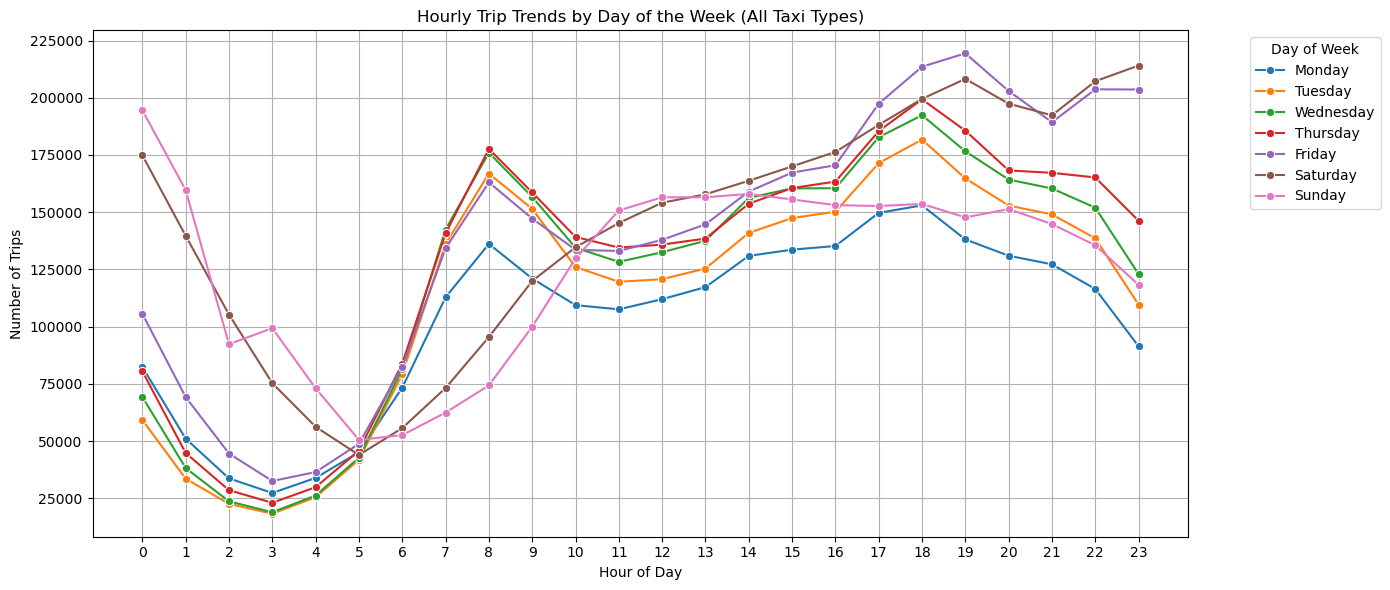

In [4]:
# Map numeric day of week to names for plotting only
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
           5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Copy df to avoid changing the original
df_plot = df.copy()

# Map PU_day_of_week to day names
df_plot['PU_day_of_week'] = df_plot['PU_day_of_week'].map(day_map)

# Define day and hour ranges
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_range = range(24)

# Create a full index of all day/hour combinations
full_index = pd.MultiIndex.from_product([day_order, hour_range], names=['PU_day_of_week', 'PU_hour'])

# Count trips by day/hour and fill in missing combinations with 0
hourly_by_day = df_plot.groupby(['PU_day_of_week', 'PU_hour']).size().reindex(full_index, fill_value=0).reset_index(name='trip_count')

# Ensure PU_day_of_week is a categorical type with correct order
hourly_by_day['PU_day_of_week'] = pd.Categorical(hourly_by_day['PU_day_of_week'], categories=day_order, ordered=True)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_by_day, x='PU_hour', y='trip_count', hue='PU_day_of_week', marker='o')

plt.title("Hourly Trip Trends by Day of the Week (All Taxi Types)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Images/hourly_trip_trends_by_day_of_the_week.png', dpi=300)
plt.show()


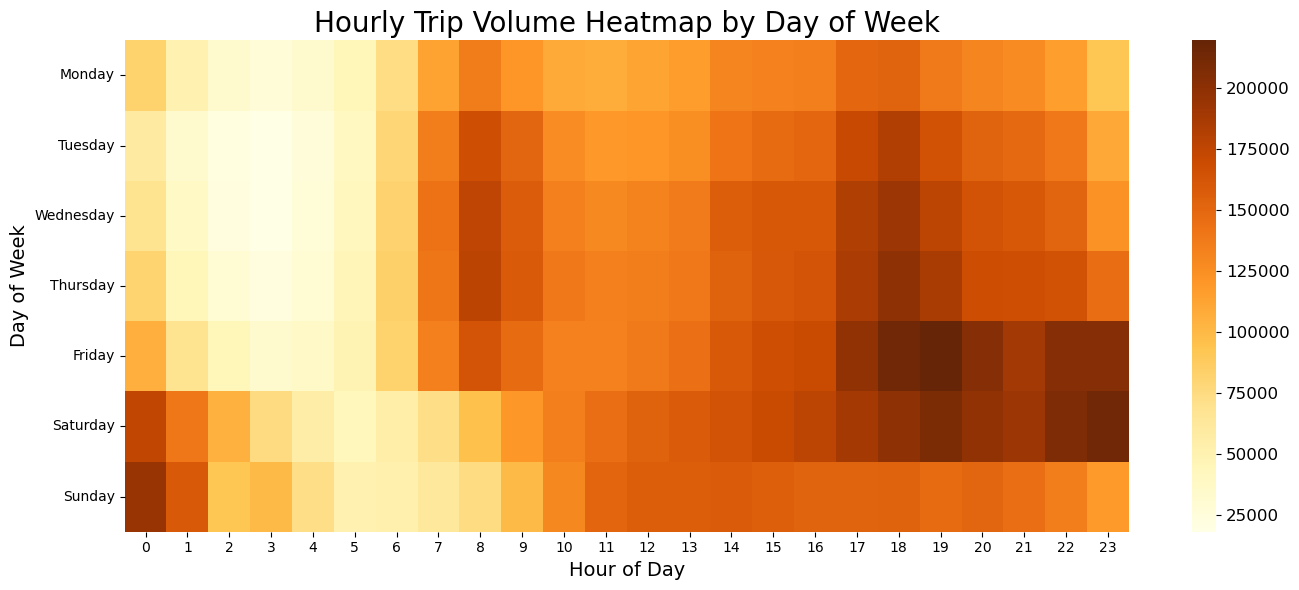

In [6]:
pivot = hourly_by_day.pivot(index='PU_day_of_week', columns='PU_hour', values='trip_count')

plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot, cmap="YlOrBr", annot=False)

# Increase font size of colorbar tick labels
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)

plt.title("Hourly Trip Volume Heatmap by Day of Week", fontsize=20)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Day of Week", fontsize=14)
plt.tight_layout()
plt.savefig('Images/hourly_trip_volumne_heatmap_by_day_of_week.png', dpi=300)
plt.show()


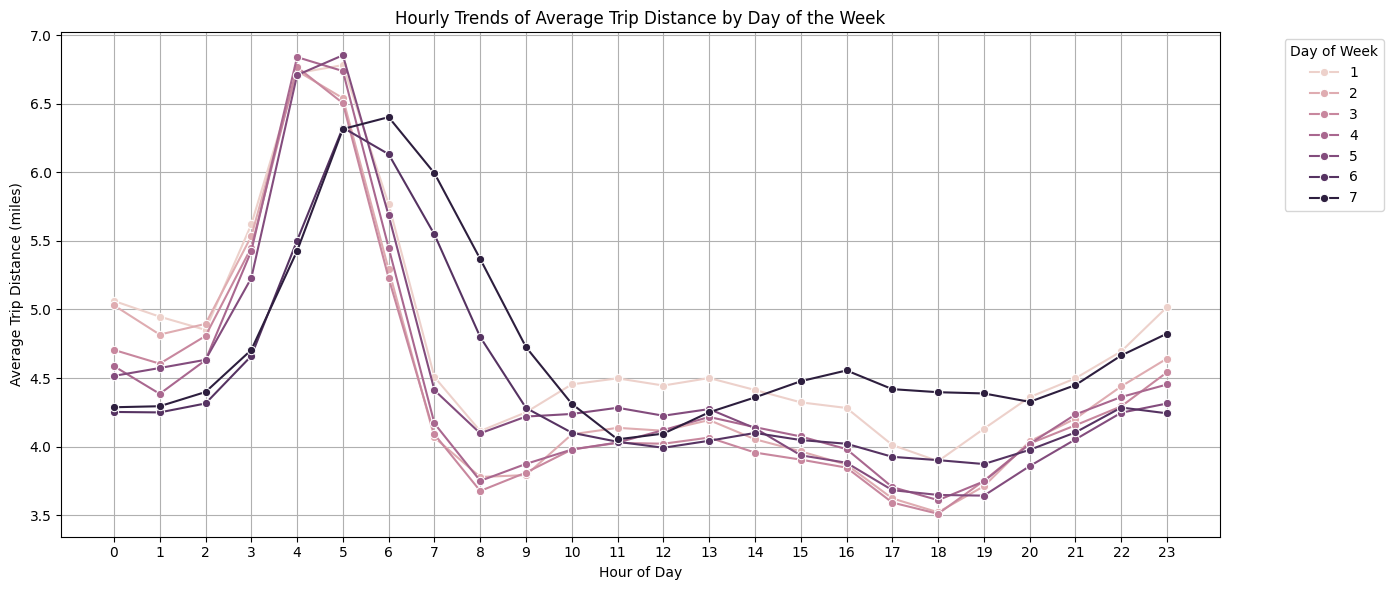

In [16]:
# Group by day and hour, then calculate average trip distance
distance_by_day_hour = df.groupby(['PU_day_of_week', 'PU_hour'])['trip_distance'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=distance_by_day_hour, x='PU_hour', y='trip_distance', hue='PU_day_of_week', marker='o')

plt.title("Hourly Trends of Average Trip Distance by Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Distance (miles)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


PU_hour   0    1    2    3    4    5    6    7    8    9   ...   14   15   16  \
count    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
mean     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
std      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
min      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
25%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
50%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
75%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
max      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

PU_hour   17   18   19   20   21   22   23  
count    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  


/Users/yelim/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/yelim/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


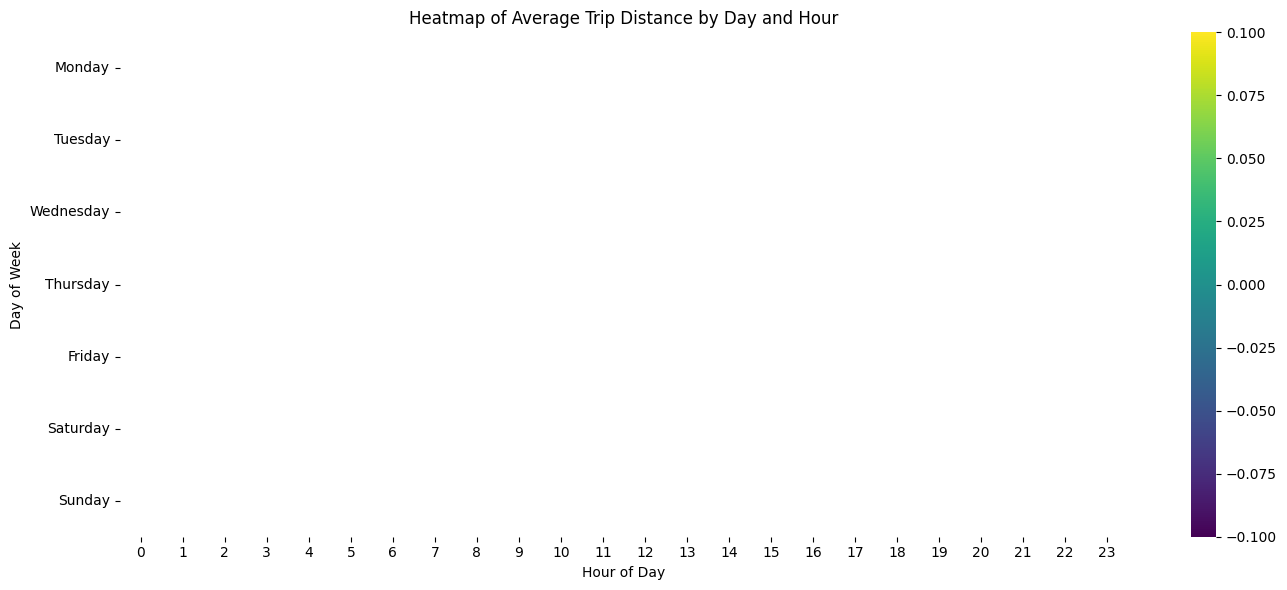

In [20]:
# Ensure day order is consistent
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
distance_by_day_hour['PU_day_of_week'] = pd.Categorical(
    distance_by_day_hour['PU_day_of_week'],
    categories=day_order,
    ordered=True
)

# Handle duplicates by aggregating (taking the mean) for duplicate combinations
distance_by_day_hour = distance_by_day_hour.groupby(['PU_day_of_week', 'PU_hour'], as_index=False, observed=False)['trip_distance'].mean()

# Pivot table for heatmap
pivot = distance_by_day_hour.pivot(index='PU_day_of_week', columns='PU_hour', values='trip_distance')

# Check the range of values
print(pivot.describe())

# If necessary, fill NaN values with the mean or median
pivot = pivot.fillna(pivot.mean())

# Normalize values if they are all the same
pivot = (pivot - pivot.min()) / (pivot.max() - pivot.min())

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap="viridis", annot=False, linewidths=0.3)

plt.title("Heatmap of Average Trip Distance by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

Trip Distance at night is high. But average trip distancee at 1pm Monday and Thursday is relatively high!

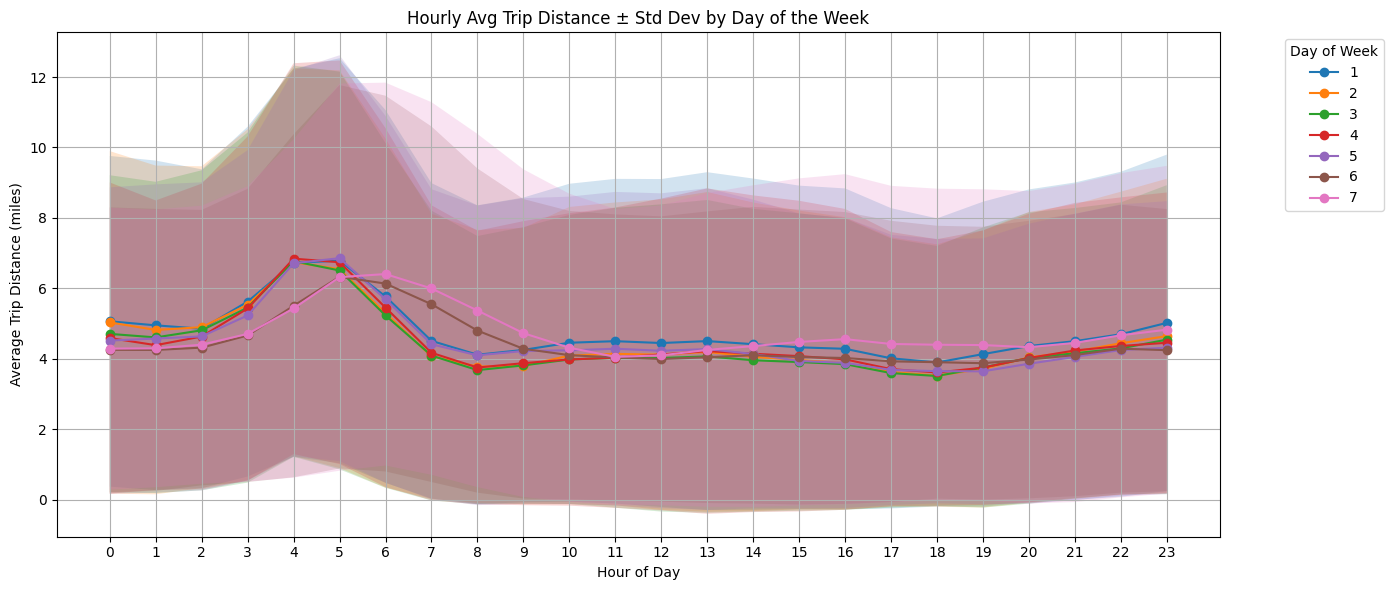

In [23]:
# Calculate mean and std per hour per day
agg = df.groupby(['PU_day_of_week', 'PU_hour'])['trip_distance'].agg(['mean', 'std']).reset_index()

# Plot with error bars manually
plt.figure(figsize=(14, 6))
for day in agg['PU_day_of_week'].unique():
    subset = agg[agg['PU_day_of_week'] == day]
    plt.plot(subset['PU_hour'], subset['mean'], marker='o', label=day)
    plt.fill_between(subset['PU_hour'], subset['mean'] - subset['std'], subset['mean'] + subset['std'], alpha=0.2)

plt.title("Hourly Avg Trip Distance ± Std Dev by Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Distance (miles)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Images/hourly_avg_trip_distance_std_dev.png', dpi=300)
plt.show()


I am dropping records that has airpods bc it has a significant impact

In [38]:
# Define airports to exclude
excluded_zones = ['JFK Airport', 'LaGuardia Airport', 'Newark Airport']

# Filter out rows where either PU_zone or DO_zone is in excluded_zones
taxi_09_no_airport_df = taxi_09_df[
    (~taxi_09_df['PU_zone'].isin(excluded_zones)) &
    (~taxi_09_df['DO_zone'].isin(excluded_zones))
]


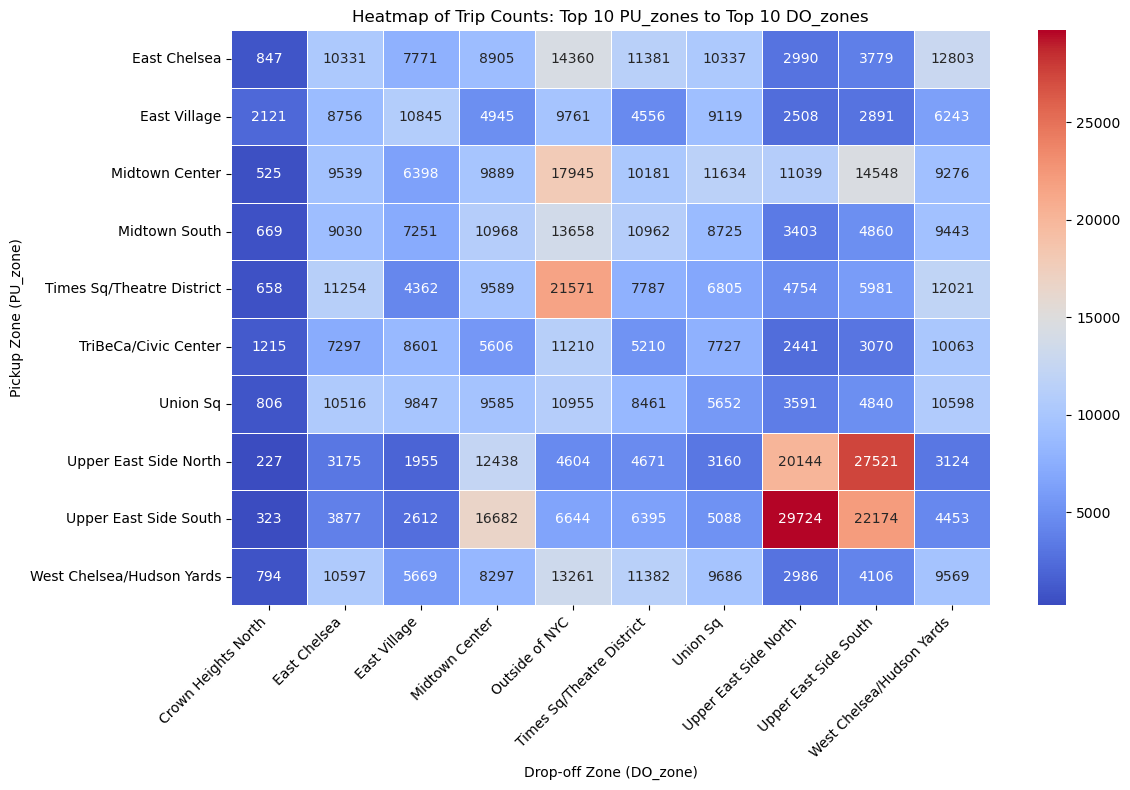

In [39]:
# Step 1: Identify Top 10 PU_zones and DO_zones by frequency
top_pu_zones = taxi_09_no_airport_df['PU_zone'].value_counts().head(10).index.tolist()
top_do_zones = taxi_09_no_airport_df['DO_zone'].value_counts().head(10).index.tolist()

# Step 2: Filter rows where both PU_zone and DO_zone are in their respective top 10s
filtered_df = taxi_09_no_airport_df[
    (taxi_09_no_airport_df['PU_zone'].isin(top_pu_zones)) &
    (taxi_09_no_airport_df['DO_zone'].isin(top_do_zones))
]

# Step 3: Create pivot table of trip counts from PU_zone to DO_zone
heatmap_data = pd.pivot_table(
    filtered_df,
    index='PU_zone',
    columns='DO_zone',
    aggfunc='size',
    fill_value=0
)

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt='d', linewidths=0.5)
plt.title("Heatmap of Trip Counts: Top 10 PU_zones to Top 10 DO_zones")
plt.xlabel("Drop-off Zone (DO_zone)")
plt.ylabel("Pickup Zone (PU_zone)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


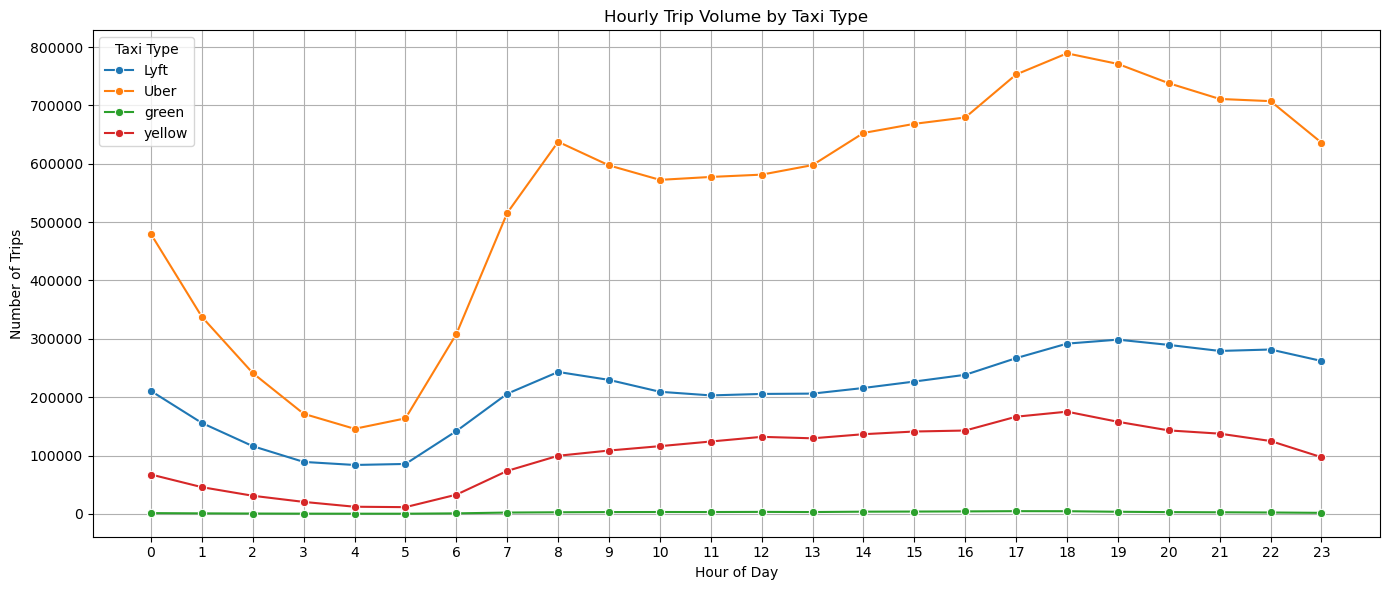

In [40]:
# Group by taxi_type and PU_hour
hourly_trends = taxi_09_no_airport_df.groupby(['taxi_type', 'PU_hour']).size().reset_index(name='trip_count')

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_trends, x='PU_hour', y='trip_count', hue='taxi_type', marker='o')

plt.title("Hourly Trip Volume by Taxi Type")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Taxi Type")
plt.tight_layout()
plt.show()


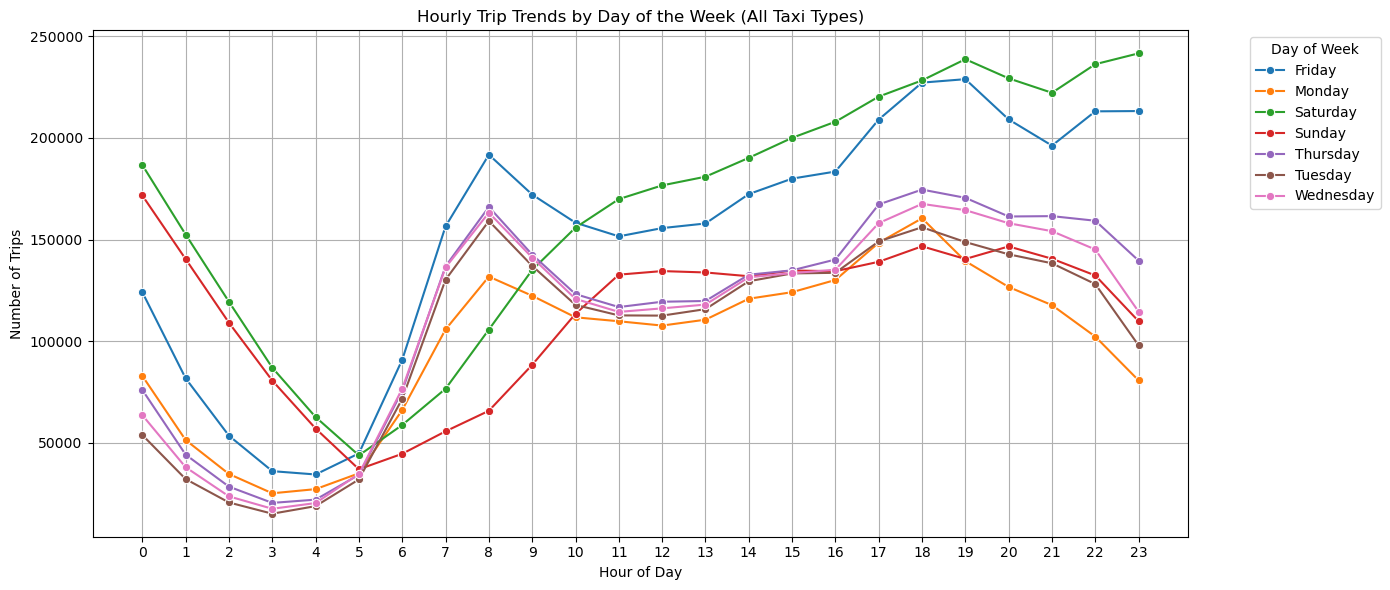

In [41]:
# Group by day of week and hour
hourly_by_day = taxi_09_no_airport_df.groupby(['PU_day_of_week', 'PU_hour']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_by_day, x='PU_hour', y='trip_count', hue='PU_day_of_week', marker='o')

plt.title("Hourly Trip Trends by Day of the Week (All Taxi Types)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


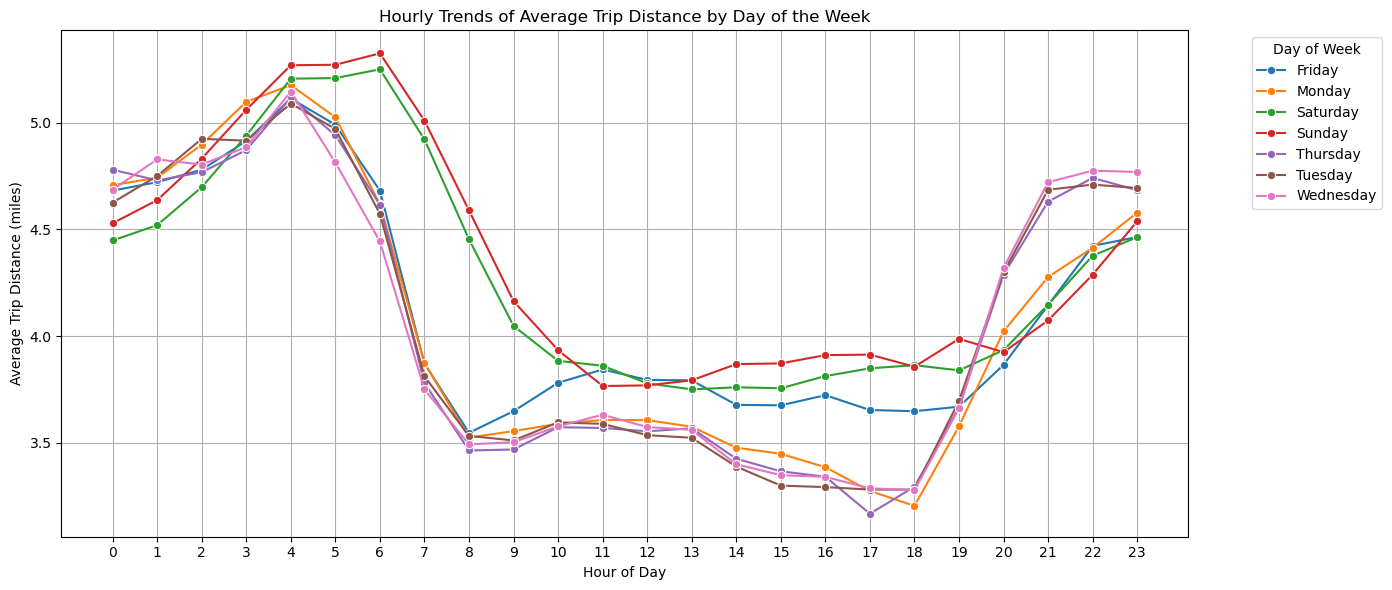

In [42]:
# Group by day and hour, then calculate average trip distance
distance_by_day_hour = taxi_09_no_airport_df.groupby(['PU_day_of_week', 'PU_hour'])['trip_distance'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=distance_by_day_hour, x='PU_hour', y='trip_distance', hue='PU_day_of_week', marker='o')

plt.title("Hourly Trends of Average Trip Distance by Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Distance (miles)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Monday and Thursday 1pm still has a spike!

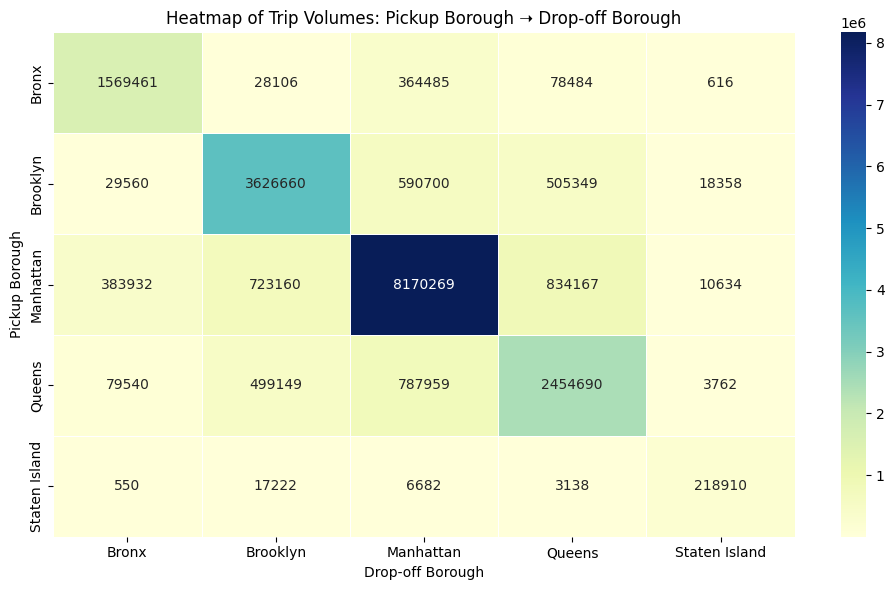

In [24]:
# Step 1: Group by pickup and drop-off boroughs
borough_matrix = (
    df
    .groupby(['PU_borough', 'DO_borough'])
    .size()
    .reset_index(name='trip_count')
    .pivot(index='PU_borough', columns='DO_borough', values='trip_count')
    .fillna(0)
)

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(borough_matrix, annot=True, fmt='.0f', cmap="YlGnBu", linewidths=0.5)

plt.title("Heatmap of Trip Volumes: Pickup Borough ➝ Drop-off Borough")
plt.xlabel("Drop-off Borough")
plt.ylabel("Pickup Borough")
plt.tight_layout()
plt.savefig('Images/heatmap_of_trip_volumes.png', dpi=300)
plt.show()


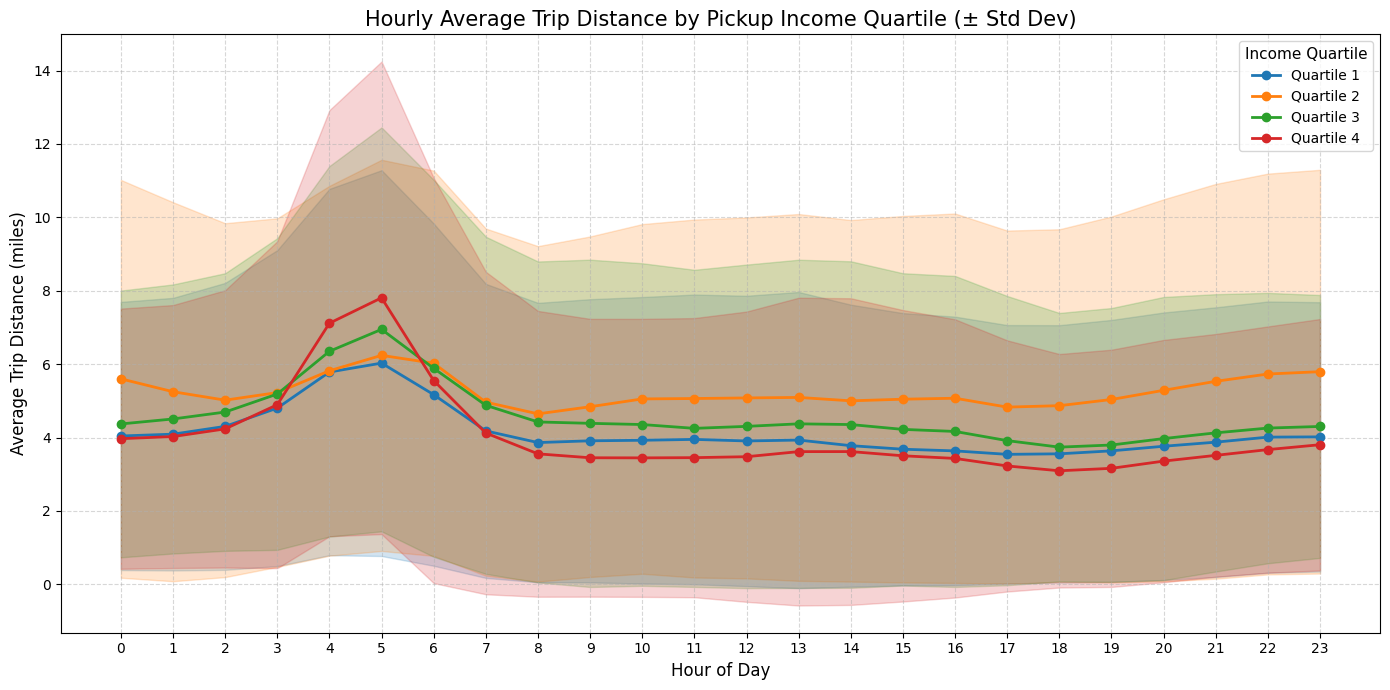

In [26]:
# Define distinct colors for each quartile
colors = {
    1: "#1f77b4",  # Blue
    2: "#ff7f0e",  # Orange
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
}

agg = (
    df
    .groupby(['PU_income_quartile', 'PU_hour'])['trip_distance']
    .agg(['mean', 'std'])
    .reset_index()
)


plt.figure(figsize=(14, 7))

for quartile in sorted(agg['PU_income_quartile'].dropna().unique()):
    data = agg[agg['PU_income_quartile'] == quartile]
    color = colors[int(quartile)]
    label = f"Quartile {int(quartile)}"

    # Plot the line
    plt.plot(data['PU_hour'], data['mean'], label=label, color=color, marker='o', linewidth=2)

    # Plot shaded std deviation
    plt.fill_between(
        data['PU_hour'],
        data['mean'] - data['std'],
        data['mean'] + data['std'],
        color=color,
        alpha=0.2
    )

# Formatting
plt.title("Hourly Average Trip Distance by Pickup Income Quartile (± Std Dev)", fontsize=15)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Trip Distance (miles)", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Income Quartile", title_fontsize=11, fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig('Images/hourly_average_trip_distance_by_pickup_income_quartile.png', dpi=300)
plt.show()


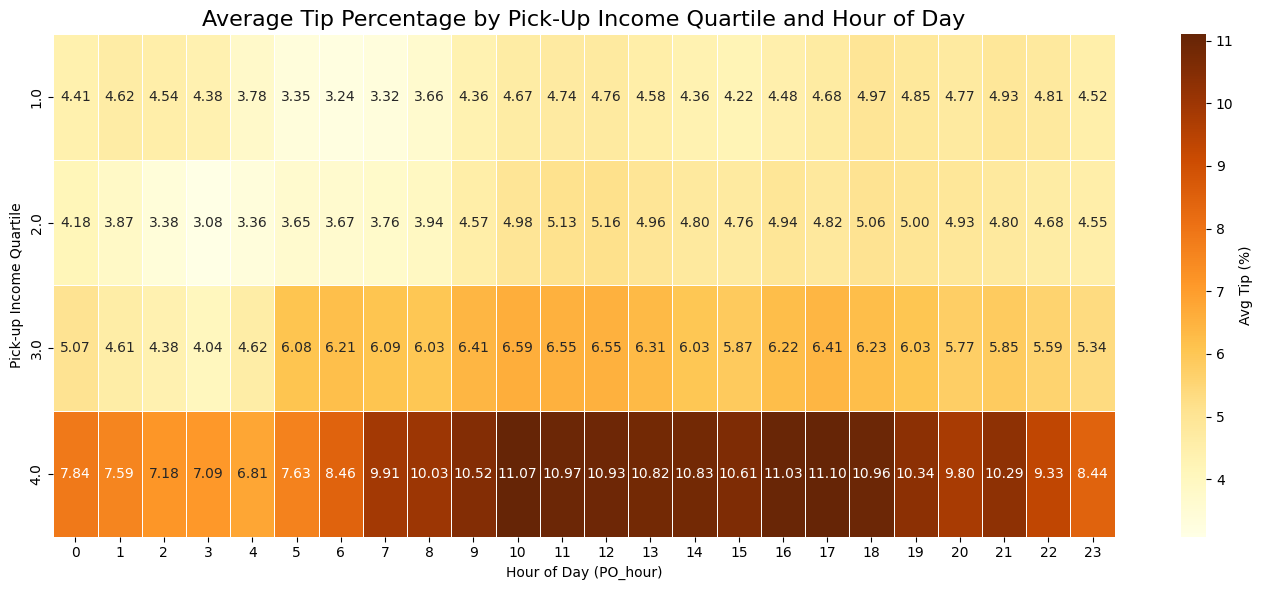

In [29]:
# Group by DO income quartile and DO hour, calculate average tip
hourly_tip_by_do_income = df.groupby(['PU_income_quartile', 'PU_hour']).agg(
    avg_tip=('tip_percentage', 'mean')
).reset_index()

# Pivot for heatmap
heatmap_data_do = hourly_tip_by_do_income.pivot_table(
    index='PU_income_quartile',
    columns='PU_hour',
    values='avg_tip'
)

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_do, cmap='YlOrBr', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Avg Tip (%)'})

# Titles and labels
plt.title('Average Tip Percentage by Pick-Up Income Quartile and Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (PO_hour)')
plt.ylabel('Pick-up Income Quartile')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Images/average_tip_percentage_by_pick_up_income_quartile_hour_of_day.png', dpi=300)
plt.show()


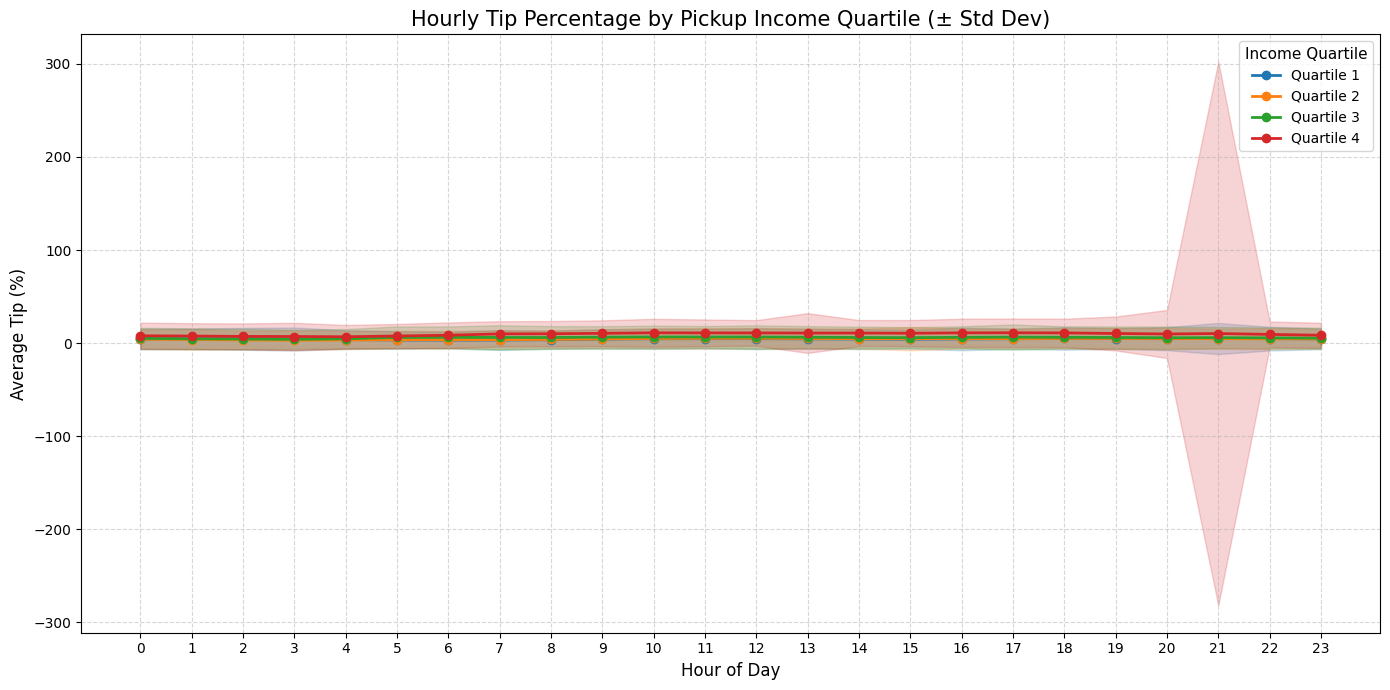

In [31]:
# Define distinct colors for each quartile
colors = {
    1: "#1f77b4",  # Blue
    2: "#ff7f0e",  # Orange
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
}

agg = (
    df
    .groupby(['PU_income_quartile', 'PU_hour'])['tip_percentage']
    .agg(['mean', 'std'])
    .reset_index()
)


plt.figure(figsize=(14, 7))

for quartile in sorted(agg['PU_income_quartile'].dropna().unique()):
    data = agg[agg['PU_income_quartile'] == quartile]
    color = colors[int(quartile)]
    label = f"Quartile {int(quartile)}"

    # Plot the line
    plt.plot(data['PU_hour'], data['mean'], label=label, color=color, marker='o', linewidth=2)

    # Plot shaded std deviation
    plt.fill_between(
        data['PU_hour'],
        data['mean'] - data['std'],
        data['mean'] + data['std'],
        color=color,
        alpha=0.2
    )

# Formatting
plt.title("Hourly Tip Percentage by Pickup Income Quartile (± Std Dev)", fontsize=15)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Tip (%)", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Income Quartile", title_fontsize=11, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()


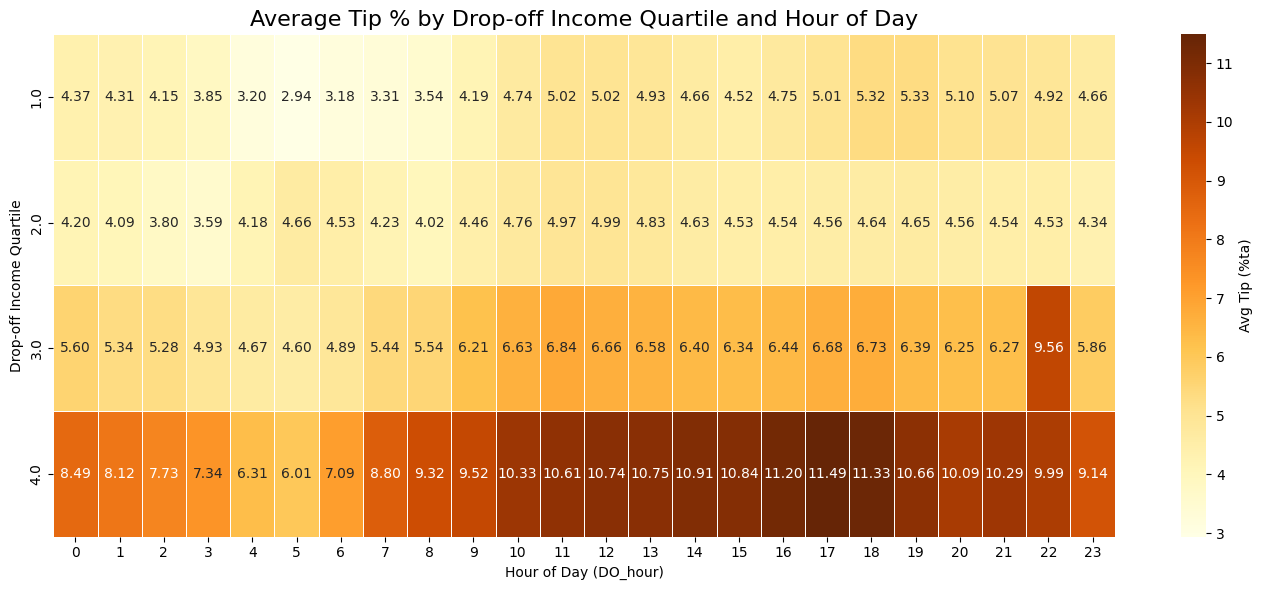

In [32]:
# Group by DO income quartile and DO hour, calculate average tip
hourly_tip_by_do_income = df.groupby(['DO_income_quartile', 'DO_hour']).agg(
    avg_tip=('tip_percentage', 'mean')
).reset_index()

# Pivot for heatmap
heatmap_data_do = hourly_tip_by_do_income.pivot_table(
    index='DO_income_quartile',
    columns='DO_hour',
    values='avg_tip'
)

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_do, cmap='YlOrBr', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Avg Tip (%ta)'})

# Titles and labels
plt.title('Average Tip % by Drop-off Income Quartile and Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (DO_hour)')
plt.ylabel('Drop-off Income Quartile')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

no_airport_df = df[(df["PU_location_id"] != 132) & (df["PU_location_id"] != 138) & (df["PU_location_id"] != 1) & 
(df["DO_location_id"] != 132) & (df["DO_location_id"] != 138) & (df["DO_location_id"] != 1)]

# Group by PU and DO income quartiles and count trips
volume_by_quartiles = no_airport_df.groupby(['PU_income_quartile', 'DO_income_quartile']).size().reset_index(name='trip_volume')

# Pivot to get DO quartiles as rows, PU quartiles as columns
heatmap_data = volume_by_quartiles.pivot_table(
    index='DO_income_quartile',
    columns='PU_income_quartile',
    values='trip_volume',
    fill_value=0
).astype(int)  # ensure values are integers for formatting

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Trip Volume'}
)

# Titles and labels
plt.title('Trip Volume by Pickup and Drop-off Income Quartiles', fontsize=16)
plt.xlabel('Pickup Income Quartile')
plt.ylabel('Drop-off Income Quartile')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 2.01 GiB for an array with shape (14, 19306984) and data type float64

In [77]:
# Step 1: Filter to early morning hours
hour_3 = taxi_09_df[taxi_09_df['PU_hour'] == 3]
hour_4 = taxi_09_df[taxi_09_df['PU_hour'] == 4]
hour_5 = taxi_09_df[taxi_09_df['PU_hour'] == 5]
hour_6 = taxi_09_df[taxi_09_df['PU_hour'] == 6]

top_hour_3 = (
    hour_3
    .groupby(['PU_zone', 'PU_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

top_hour_4 = (
    hour_4
    .groupby(['PU_zone', 'PU_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)
top_hour_5 = (
    hour_5
    .groupby(['PU_zone', 'PU_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)
top_hour_6 = (
    hour_6
    .groupby(['PU_zone', 'PU_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

print(top_hour_3)
print(top_hour_4)
print(top_hour_5)
print(top_hour_6)


                       PU_zone  PU_income_quartile  pickup_count
75                East Village                 1.0         12137
142            Lower East Side                 1.0         11606
76           East Williamsburg                 1.0          9900
34              Bushwick South                 2.0          7262
45                Clinton East                 1.0          6655
33              Bushwick North                 2.0          6481
242               West Village                 4.0          6246
223  Times Sq/Theatre District                 4.0          5547
158              Midtown South                 4.0          5446
64                East Chelsea                 1.0          4722
                       PU_zone  PU_income_quartile  pickup_count
76           East Williamsburg                 1.0          7759
75                East Village                 1.0          7161
141            Lower East Side                 1.0          6732
34              Bushwick 

In [79]:
# Step 1: Filter to early morning hours
hour_3 = taxi_09_df[taxi_09_df['DO_hour'] == 3]
hour_4 = taxi_09_df[taxi_09_df['DO_hour'] == 4]
hour_5 = taxi_09_df[taxi_09_df['DO_hour'] == 5]
hour_6 = taxi_09_df[taxi_09_df['DO_hour'] == 6]

top_hour_3 = (
    hour_3
    .groupby(['DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

top_hour_4 = (
    hour_4
    .groupby(['DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)
top_hour_5 = (
    hour_5
    .groupby(['DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)
top_hour_6 = (
    hour_6
    .groupby(['DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

print(top_hour_3)
print(top_hour_4)
print(top_hour_5)
print(top_hour_6)


                 DO_zone  DO_income_quartile  pickup_count
122          JFK Airport                 2.0          8926
34        Bushwick South                 2.0          6838
131    LaGuardia Airport                 2.0          6405
57   Crown Heights North                 2.0          5838
75          East Village                 1.0          5238
217   Stuyvesant Heights                 2.0          4572
33        Bushwick North                 2.0          4333
45          Clinton East                 1.0          4237
14               Bedford                 1.0          3862
4                Astoria                 2.0          3850
                          DO_zone  DO_income_quartile  pickup_count
130             LaGuardia Airport                 2.0         26350
121                   JFK Airport                 2.0         20456
34                 Bushwick South                 2.0          5465
57            Crown Heights North                 2.0          4820
72         

In [113]:
# Step 1: Filter to early morning hours
hour_3_4 = taxi_09_df[(taxi_09_df['PU_hour'] == 3) & (taxi_09_df['PU_income_quartile'] == 4.0)]
hour_4_4 = taxi_09_df[(taxi_09_df['PU_hour'] == 4) & (taxi_09_df['PU_income_quartile'] == 4.0)]
hour_5_4 = taxi_09_df[(taxi_09_df['PU_hour'] == 5) & (taxi_09_df['PU_income_quartile'] == 4.0)]
hour_6_4 = taxi_09_df[(taxi_09_df['PU_hour'] == 6) & (taxi_09_df['PU_income_quartile'] == 4.0)]

top_3am_4income = (
    hour_3_4
    .groupby(['PU_zone', 'DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

top_4am_4income = (
    hour_4_4
    .groupby(['PU_zone', 'DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

top_5am_4income = (
    hour_5_4
    .groupby(['PU_zone', 'DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

top_6am_4income = (
    hour_6_4
    .groupby(['PU_zone', 'DO_zone', 'DO_income_quartile'])
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

print(top_3am_4income)
print(top_4am_4income)
print(top_5am_4income)
print(top_6am_4income)

                        PU_zone                         DO_zone  \
5318  Times Sq/Theatre District               LaGuardia Airport   
6510  West Chelsea/Hudson Yards                    Clinton East   
5309  Times Sq/Theatre District                     JFK Airport   
6930               West Village                    East Village   
3225        Little Italy/NoLiTa                    East Village   
2153    Greenwich Village South                    East Village   
6919               West Village                    East Chelsea   
4266              Midtown South  Long Island City/Hunters Point   
4260              Midtown South               LaGuardia Airport   
6512  West Chelsea/Hudson Yards                    Clinton West   

      DO_income_quartile  pickup_count  
5318                 2.0           422  
6510                 1.0           367  
5309                 2.0           267  
6930                 1.0           267  
3225                 1.0           244  
2153            

In [10]:
# Drop records with 'EWR' in PU_zone or DO_zone
no_ewr_df = df[
    ~((df['PU_borough'] == 'EWR') | (df['DO_borough'] == 'EWR'))
]
no_ewr_df.shape

(21005543, 33)

In [9]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -------------- ------------------------- 6.0/16.2 MB 28.4 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/16.2 MB 21.3 MB/s eta 0:00:01
   -------------------------- ------------- 10.7/16.2 MB 17.2 MB/s eta 0:00:01
   ------------------------------- -------- 12.8/16.2 MB 14.9 MB/s eta 0:00:01
   ------------------------------------ --- 14.9/16.2 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------- ----------------------------- 1.6/6.3 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 3.7/6.3 MB 8.7 MB/s eta 0:00:01
   ------------------------------------ --- 5.8/6.3 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 8.2 MB/s eta 0:00:00
   ---

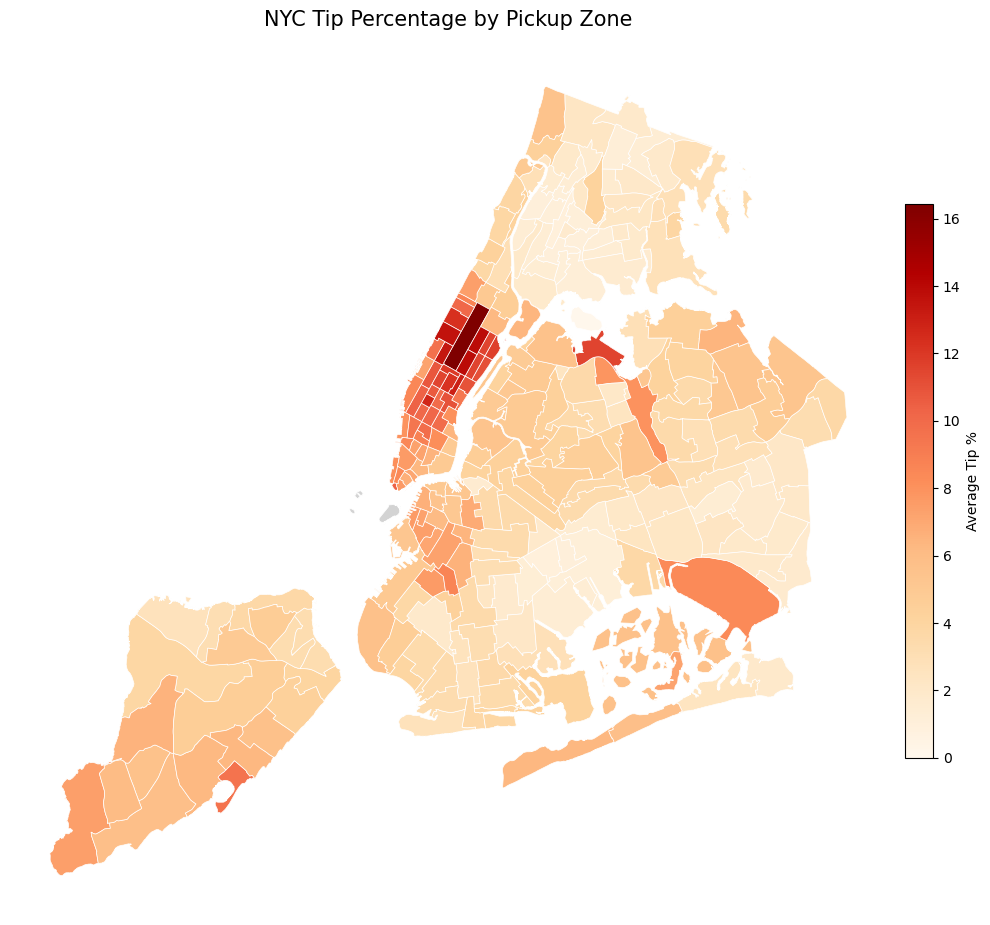

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 2: Compute average tip percentage by dropoff zone
avg_tip_df = no_ewr_df.groupby('PU_zone')['tip_percentage'].mean().reset_index()
avg_tip_df.columns = ['zone', 'avg_tip_pct']

# Step 3: Load NYC taxi zone GeoJSON
zones = gpd.read_file("taxi_zones/taxi_zones.shp")
zones = zones[zones['zone'] != 'Newark Airport']

# Step 4: Merge tip data with geometries
zones = zones.merge(avg_tip_df, left_on='zone', right_on='zone', how='left')

# Step 5: Plot static choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

zones.plot(column='avg_tip_pct',
           ax=ax,
           cmap='OrRd',
           edgecolor='white',
           linewidth=0.5,
           missing_kwds={'color': 'lightgrey'})

# Cleanup: No axis, cleaner background
ax.axis('off')
ax.set_title('NYC Tip Percentage by Pickup Zone', fontsize=15, pad=15)

# Create colorbar manually on the right
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(
    vmin=zones['avg_tip_pct'].min(), vmax=zones['avg_tip_pct'].max()))
sm._A = []  # Required for ScalarMappable in matplotlib <3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.03, pad=0.02)
cbar.set_label('Average Tip %')


plt.tight_layout()
plt.savefig("Images/nyc_tip_percentage_by_pu_zone.png", dpi=300)
plt.show()


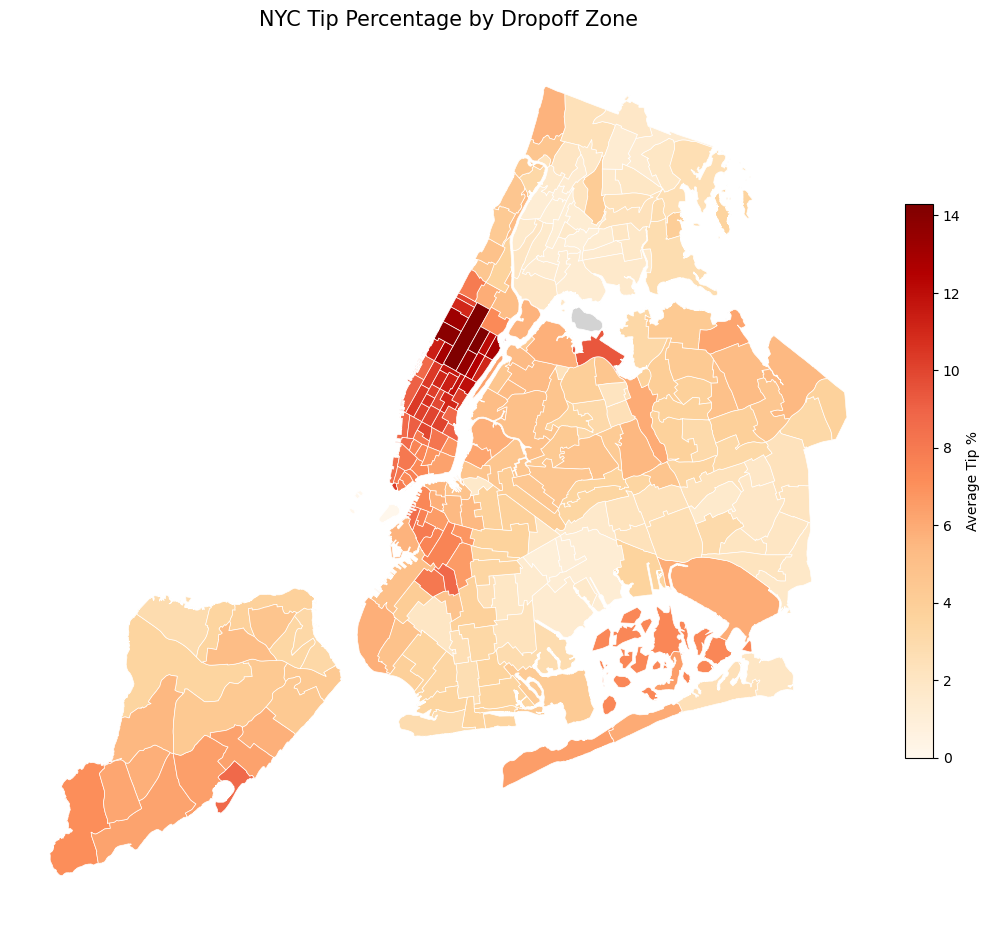

In [15]:
# Step 2: Compute average tip percentage by dropoff zone
avg_tip_df = no_ewr_df.groupby('DO_zone')['tip_percentage'].mean().reset_index()
avg_tip_df.columns = ['zone', 'avg_tip_pct']

# Step 3: Load NYC taxi zone GeoJSON
zones = gpd.read_file("taxi_zones/taxi_zones.shp")
zones = zones[zones['zone'] != 'Newark Airport']

# Step 4: Merge tip data with geometries
zones = zones.merge(avg_tip_df, left_on='zone', right_on='zone', how='left')

# Step 5: Plot static choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

zones.plot(column='avg_tip_pct',
           ax=ax,
           cmap='OrRd',
           edgecolor='white',
           linewidth=0.5,
           missing_kwds={'color': 'lightgrey'})

# Cleanup: No axis, cleaner background
ax.axis('off')
ax.set_title('NYC Tip Percentage by Dropoff Zone', fontsize=15, pad=15)

# Create colorbar manually on the right
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(
    vmin=zones['avg_tip_pct'].min(), vmax=zones['avg_tip_pct'].max()))
sm._A = []  # Required for ScalarMappable in matplotlib <3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.03, pad=0.02)
cbar.set_label('Average Tip %')


plt.tight_layout()
plt.savefig("Images/nyc_tip_percentage_by_do_zone.png", dpi=300)
plt.show()


In [16]:
# 1. Filter time ranges
night_pu_df = df[df['PU_hour'].between(0, 5)]
day_pu_df = df[df['PU_hour'].between(6, 23)]

# 2. Compute average tip % by DO_zone
night_tip = night_pu_df.groupby('PU_zone')['tip_percentage'].mean().reset_index()
night_tip.columns = ['zone', 'avg_tip_pct_night']

day_tip = day_pu_df.groupby('PU_zone')['tip_percentage'].mean().reset_index()
day_tip.columns = ['zone', 'avg_tip_pct_day']


# 4. Merge both tip % columns into zones
zones = zones.merge(night_tip, on='zone', how='left')
zones = zones.merge(day_tip, on='zone', how='left')

# 5. Get shared min & max tip % for both time ranges
combined_tip = pd.concat([zones['avg_tip_pct_night'], zones['avg_tip_pct_day']])
vmin, vmax = combined_tip.min(), combined_tip.max()

# 6. Create plots
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Nighttime
zones.plot(
    column='avg_tip_pct_night',
    cmap='OrRd',
    linewidth=0.5,
    ax=axes[0],
    edgecolor='white',
    vmin=vmin, vmax=vmax,
    missing_kwds={'color': 'lightgrey'},
    legend=False
)
axes[0].set_title("Avg Tip % (Night: 12 AM - 6 AM)", fontsize=14)
axes[0].axis('off')

# Daytime
zones.plot(
    column='avg_tip_pct_day',
    cmap='OrRd',
    linewidth=0.5,
    ax=axes[1],
    edgecolor='white',
    vmin=vmin, vmax=vmax,
    missing_kwds={'color': 'lightgrey'},
    legend=False
)
axes[1].set_title("Avg Tip % (Day: 6 AM - 12 AM)", fontsize=14)
axes[1].axis('off')

# 7. Add matching colorbars to both
for idx in range(2):
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, ax=axes[idx], orientation="vertical", fraction=0.03, pad=0.02)
    cbar.set_label('Average Tip %')

plt.tight_layout()
plt.savefig("nyc_tip_day_vs_night_consistent.png", dpi=300)
plt.show()


KeyError: 'Column not found: tip_PCT'

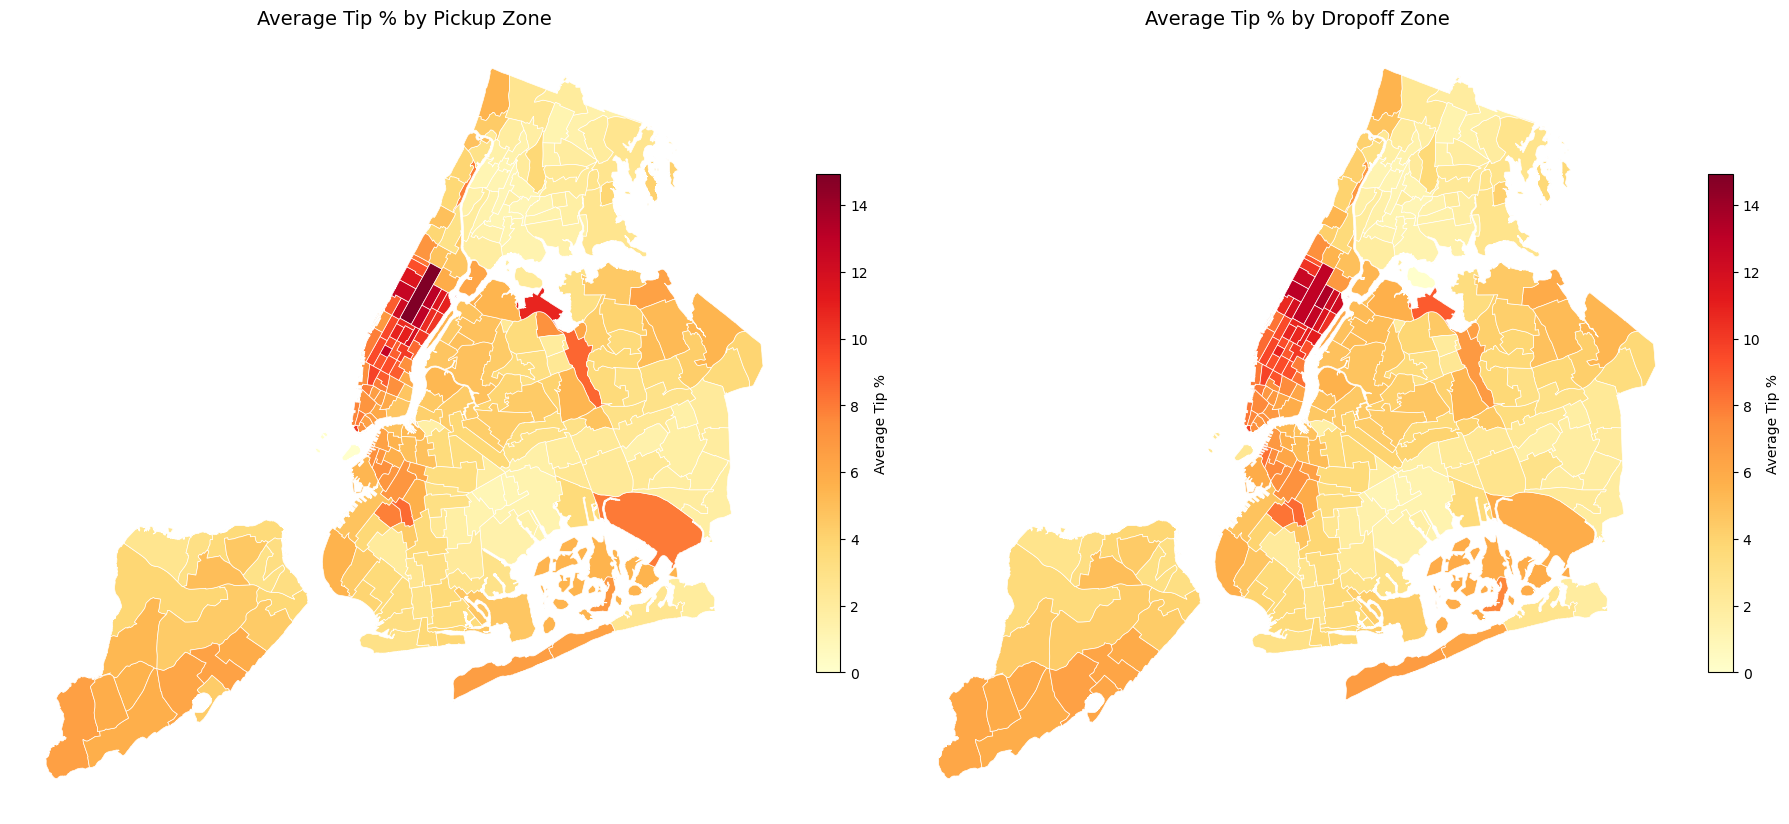

In [135]:
# Step 2: Compute average tip % by pickup and dropoff zones
pu_tip = taxi_09_df.groupby('PU_zone')['tip_PCT'].mean().reset_index()
pu_tip.columns = ['zone', 'avg_tip_pct_PU']

do_tip = taxi_09_df.groupby('DO_zone')['tip_PCT'].mean().reset_index()
do_tip.columns = ['zone', 'avg_tip_pct_DO']


# Step 4: Merge both pickup and dropoff tip stats
zones = zones.merge(pu_tip, on='zone', how='left')
zones = zones.merge(do_tip, on='zone', how='left')

# Step 5: Get shared color range for consistent mapping
combined_tip_vals = pd.concat([zones['avg_tip_pct_PU'], zones['avg_tip_pct_DO']])
vmin, vmax = combined_tip_vals.min(), combined_tip_vals.max()

# Step 6: Plot both maps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Pickup zone map
zones.plot(
    column='avg_tip_pct_PU',
    cmap='YlOrRd',
    linewidth=0.5,
    ax=axes[0],
    edgecolor='white',
    vmin=vmin, vmax=vmax,
    missing_kwds={'color': 'lightgrey'},
    legend=False
)
axes[0].set_title("Average Tip % by Pickup Zone", fontsize=14)
axes[0].axis('off')

# Dropoff zone map
zones.plot(
    column='avg_tip_pct_DO',
    cmap='YlOrRd',
    linewidth=0.5,
    ax=axes[1],
    edgecolor='white',
    vmin=vmin, vmax=vmax,
    missing_kwds={'color': 'lightgrey'},
    legend=False
)
axes[1].set_title("Average Tip % by Dropoff Zone", fontsize=14)
axes[1].axis('off')

# Add matching colorbars
for idx, col in enumerate(['avg_tip_pct_PU', 'avg_tip_pct_DO']):
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, ax=axes[idx], orientation="vertical", fraction=0.03, pad=0.02)
    cbar.set_label('Average Tip %')

plt.tight_layout()
plt.savefig("tip_pct_pickup_vs_dropoff.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by PU and DO income quartiles and count trips
volume_by_quartiles = df.groupby(['PU_income_quartile', 'DO_income_quartile']).size().reset_index(name='trip_volume')

# Pivot to get DO quartiles as rows, PU quartiles as columns
heatmap_data = volume_by_quartiles.pivot_table(
    index='DO_income_quartile',
    columns='PU_income_quartile',
    values='trip_volume',
    fill_value=0
).astype(int)  # ensure values are integers for formatting

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Trip Volume'}
)

# Titles and labels
plt.title('Trip Volume by Pickup and Drop-off Income Quartiles', fontsize=16)
plt.xlabel('Pickup Income Quartile')
plt.ylabel('Drop-off Income Quartile')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()